In [2]:
#### IMPORT GUZTIAK
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# import keras_ocr
# import pandas as pd
# from collections import defaultdict
# import math

# **1. FASEA**
Fase honetan irudiak tratatzeko 3 metodo aztertu dira. Irudiak tratatzean lortu nahi dena da hauetan dagoen testua ateratzea. 3 aukerak konparatu ondoren, Keras-OCR erabiltzea erabaki da.

In [ ]:
# https://shegocodes.medium.com/extract-text-from-image-left-to-right-and-top-to-bottom-with-keras-ocr-b56f098a6efe
def get_distance(predictions):
    """
    Function returns dictionary with (key,value):
        * text : detected text in image
        * idx  : index in predictions
        * center_x : center of bounding box ()
        * center_y : center of bounding box (y)
        * distance_from_origin : hypotenuse
        * distance_y : distance between y and origin (0,0)
    """

    # Point of origin
    x0, y0 = 0, 0
    detections = []
    orden = 0
    for group in predictions:
        # Get center point of bounding box
        top_left_x, top_left_y = group[1][0]
        bottom_right_x, bottom_right_y = group[1][1]
        center_x = (top_left_x + bottom_right_x) / 2
        center_y = (top_left_y + bottom_right_y) / 2    # Use the Pythagorean Theorem to solve for distance from origin
        distance_from_origin = math.dist([x0,y0], [center_x, center_y])    # Calculate difference between y and origin to get unique rows
        distance_x = center_x - x0 # Append all results
        distance_y = center_y - y0    # Append all results
        detections.append({'text':group[0], 'idx': orden, 'center_x':center_x, 'center_y':center_y,
                        'distance_from_origin':distance_from_origin, 'distance_x':distance_x, 'distance_y':distance_y
        })
        orden = orden + 1
    return detections

def distinguish_rows(lst, thresh=15):
    """Function to help distinguish unique rows"""

    sublists = []
    for i in range(0, len(lst)-1):
        if lst[i+1]['distance_y'] - lst[i]['distance_y'] <= thresh:
            if lst[i] not in sublists:
                sublists.append(lst[i])
            sublists.append(lst[i+1])
        else:
            yield sublists
            sublists = [lst[i+1]]
    yield sublists

def segmentaLineas(predictions, listado, threshold=15):
    A = get_distance(predictions)
    B = list(distinguish_rows(A, threshold))      # Remove all empty rows
    C = list(filter(lambda x:x!=[], B))    # Order text detections in human readable format

    texto = defaultdict(list)
    num_linea = 0
    ordered_preds = []
    for pr in C:
        row = sorted(pr, key=lambda x:x['distance_from_origin'])
        num_palabra = 0
        palabras = []
        for each in row:
            ordered_preds.append(each['text'])
            idx = each['idx']
            palabras.append(listado.loc[each['idx']].text)
            num_palabra += 1
        texto[num_linea].append(palabras)
        num_linea += 1
    return texto, ordered_preds

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 6s 6s/step
defaultdict(<class 'list'>, {0: [['martxan', 'jarri']], 1: [['errepikatu', 'n', 'aldiz']], 2: [['ne', 's']], 3: [['baldin', 'bai']], 4: [['mugitu', 'aurrera']], 5: [['amaitu', 'baldin']], 6: [['biratu', 'esk']], 7: [['amaitu', 'errepikatu']]}) ['martxan', 'jarri', 'errepikatu', 'n', 'aldiz', 'ne', 's', 'baldin', 'bai', 'mugitu', 'aurrera', 'amaitu', 'baldin', 'biratu', 'esk', 'amaitu', 'errepikatu']


<Axes: >

<Figure size 640x480 with 0 Axes>

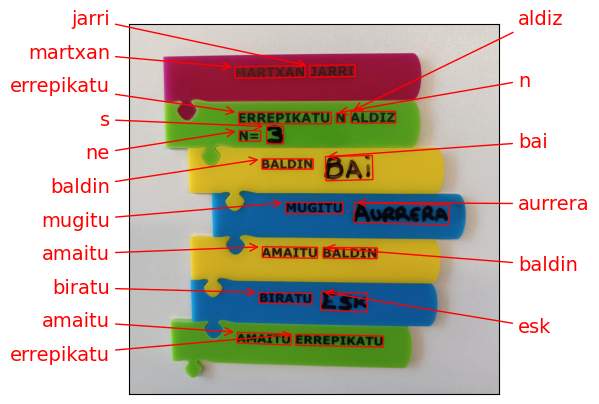

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()
im_path = 'Test2egitekoIrudia.jpg'
im = keras_ocr.tools.read(im_path)
prediction_im = pipeline.recognize([im])
# ORDENA LOS RESULTADOS POR LINEAS
listado = pd.DataFrame(prediction_im[0], columns=['text', 'bbox'])
texto, textoOrdenado = segmentaLineas(prediction_im[0], listado, threshold=25)
print(texto, textoOrdenado)
fig = plt.figure()
keras_ocr.tools.drawAnnotations(image=im, predictions=prediction_im[0])

In [ ]:
programa=[]
for hitza in textoOrdenado:
  programa.append(hitza.upper())
print(programa)

['MARTXAN', 'JARRI', 'ERREPIKATU', 'N', 'ALDIZ', 'NE', 'S', 'BALDIN', 'BAI', 'MUGITU', 'AURRERA', 'AMAITU', 'BALDIN', 'BIRATU', 'ESK', 'AMAITU', 'ERREPIKATU']


# **2. FASEA**
Behin testua lortu dudanean, testu hori aztertu eta kodea sortu behar dut. Horretarako, lehenengoz, kodea ondo dagoela suposatuko dut (konpiladorearen lana egin gabe). Behin prozesu hori lortuta, 2. fasearen 2. zatira pasatuko naiz, non fitxekin sortutako programa ondo egituratuta dagoela ziurtatuko dut.

## **MUGITU FUNTZIOA**

In [6]:
##### MUGITU #####

      ####################################################################################################
      # Funtzio honek pertsonaia aurrera edo atzera pauso 1 mugituko du.
        # nora parametroak AURRERA edo ATZERA egin behar duen zehaztuko du.
        # pos parametroak momentu horretako posizioa zein den zehaztuko du.
        # noraBegira parametroak pertsonaia nola kokatuta dagoen definituko du, hau da, nora dagoen begira.
        # m balioak taularen neurriak zehazten ditu, mXm-ko taula baita.
      ####################################################################################################

def mugitu(nora,pos,noraBegira):
  ## AURRERA MUGITZEKO
  aurrekopos=pos
  if nora == 'AURRERA':
    ## BEHERA BEGIRA (HEGOALDEA) noraBegira = ⇩
    if noraBegira=='⇩' and pos[0]<m-1:
      if taula[pos[0]+1][pos[1]] in (1,2,3):
          pos=[pos[0]+1, pos[1]]
      else:
         return False

    ## GORA BEGIRA (IPARRALDEA) noraBegira = ⇧
    elif noraBegira=='⇧' and pos[0]>0:
      if taula[pos[0]-1][pos[1]] in (1,2,3):
        pos=[pos[0]-1, pos[1]]
      else:
         return False


    ## ESKUINERA BEGIRA (EKIALDEA) noraBegira = ⇦
    elif noraBegira=='⇦' and pos[1]>0:
      if taula[pos[0]][pos[1]-1] in (1,2,3):
        pos=[pos[0], pos[1]-1]
      else:
         return False

    ## EZKERRERA BEGIRA (MENDEBALDEA) noraBegira = ⇨
    elif noraBegira=='⇨' and pos[1]<m-1:
      if taula[pos[0]][pos[1]+1] in (1,2,3):
        pos=[pos[0], pos[1]+1]
      else:
         return False

  ## ATZERA MUGITZEKO
  elif nora == 'ATZERA':
    ## BEHERA BEGIRA (HEGOALDEA) noraBegira = ⇩
    if pos[0]>0 and noraBegira=='⇩':
      if taula[pos[0]-1][pos[1]] in (1,2,3):
        pos=[pos[0]-1, pos[1]]
      else:
         return False

   ## GORA BEGIRA (IPARRALDEA) noraBegira = ⇧
    elif  pos[0]<m-1  and noraBegira=='⇧':
      if taula[pos[0]+1][pos[1]] in (1,2,3):
        pos=[pos[0]+1, pos[1]]
      else:
         return False

   ## ESKUINERA BEGIRA (EKIALDEA) noraBegira = ⇦
    elif pos[1]<m-1 and noraBegira=='⇦':
      if taula[pos[0]][pos[1]+1] in (1,2,3):
        pos=[pos[0], pos[1]+1]
      else:
         return False

   ## EZKERRERA BEGIRA (MENDEBALDEA) noraBegira = ⇨
    elif  pos[1]>0 and noraBegira=='⇨':
      if taula[pos[0]][pos[1]-1] in (1,2,3):
        pos=[pos[0], pos[1]-1]
      else:
        return False

  else:
    print('ez da mugituko')
    return False
  return pos

## **BIRATU FUNTZIOA**

In [7]:
##### BIRATU #####

      ####################################################################################################
      # Funtzio honek pertsonaia euskuinera edo ezkerrera biratuko du.
        # nora parametroak ESKUINERA edo EZKERRERA biratu behar duen zehaztuko du.
        # noraBegira parametroak pertsonaia nola kokatuta dagoen definituko du, hau da, nora dagoen begira.
      ####################################################################################################

def biratu(nora, noraBegira):
  aukerak = ['⇨', '⇧', '⇦', '⇩']
  auk=aukerak.index(noraBegira)
  if nora == 'ESKUINERA' or nora == 'ESK' or nora =='ESKUINA':
    if auk==0:
      auk=4
    noraBegira= aukerak[auk-1]

  elif nora == 'EZKERRERA' or nora == 'EZK' or nora == 'EZKERRA':
    if auk==3:
      auk=-1
    noraBegira= aukerak[auk+1]
  else:
    print('ez da biratuko')
  return noraBegira



## **BALDIN FUNTZIOA**

In [8]:
##### BALDINTZA #####

      ####################################################################################################
      # Funtzio honek baldintzaren barruan dagoen kodea exekutatuko du.
        # kodea parametroak exekutatu beharreko kodea dauka.
        # pos parametroak momentu horretako posizioa zein den zehaztuko du.
        # noraBegira parametroak pertsonaia nola kokatuta dagoen definituko du, hau da, nora dagoen begira.
        # i parametroak programak i. hitza aztertzen ari dela adierazten du.
      ####################################################################################################

def baldin(kodea, pos, noraBegira, i):
  print(kodea, "kodea del baldin")
  a, noraBegira, pos= programaAztertu(kodea, 0, pos, noraBegira)
  return pos, noraBegira

In [9]:
### BALDINTZA BETETZEA ###

      #############################################################################################################
      # Funtzio honek baldintza betetzen den ala ez bueltatzen du.
        # baldintza parametroak BAI edo EZ balioak izango ditu eta horrek bidea egon behar den ala ez zehaztuko du.
        # nora parametroak bidea AURREAN edo ATZEAN bilatu behar den zehaztuko du.
        # pos parametroak momentu horretako posizioa zein den zehaztuko du.
        # noraBegira parametroak pertsonaia nola kokatuta dagoen definituko du, hau da, nora dagoen begira.
        # i parametroak programak i. hitza aztertzen ari dela adierazten du.
      #############################################################################################################

def baldintzaBeteDa(baldintza, nora, pos, noraBegira):
  bideaDago=mugitu(nora, pos, noraBegira)
  if (baldintza=='BAI' and bideaDago!=False) or (baldintza=='EZ' and bideaDago==False):
    return True
  else:
    return False


## **ERREPIKATU FUNTZIOA**

In [10]:
##### ERREPIKAPENA #####

def errepikatu(n, kodea, pos, noraBegira):
  for i in range(n):
    i, noraBegira, pos= programaAztertu(kodea, 0, pos, noraBegira)
  return pos, noraBegira




## **PROGRAMA AZTERTU FUNTZIOA**

In [11]:
def programaAztertu(programa, i, pos, noraBegira):
  errepikapenak=[]
  baldintzak=[]
  while i< len(programa):
      #MUGITU
      if programa[i] == 'MUGITU':
        i+=1
        if pos==False:
          break
        pos= mugitu(programa[i],pos, noraBegira)
        if pos==False:
          break

      #BIRATU
      elif programa[i] == 'BIRATU':
        i+=1
        noraBegira=biratu(programa[i],noraBegira)



      # BALDIN
      elif programa[i] == 'BALDIN' and programa[i-1] != 'AMAITU':
        baldintzak.append('baldin')
        baldintza=programa[i+1]
        i=i+2
        kodeaIf=[]
        kodeaElse=[]
        nora='AURRERA'
        while ((not (programa[i] == 'AMAITU' and programa[i+1] =='BALDIN') or len(baldintzak)>0) and ((not (programa[i] == 'BESTELA')) and len(baldintzak)>0)) :
          kodeaIf.append(programa[i])
          if programa[i] == 'BALDIN' and programa[i-1] != 'AMAITU':
            baldintzak.append('baldin')
          if programa[i]=='AURRERA' or programa[i]=='ATZERA':
            nora= programa[i]
          i=i+1
          if i==len(programa)-1:
            return i, noraBegira, pos
          if (programa[i] == 'AMAITU' and programa[i+1] =='BALDIN' or programa[i] == 'BESTELA') and len(baldintzak)>0:
            baldintzak=baldintzak[:-1]
        if 'BALDIN' in kodeaIf:
          kodeaIf.append('AMAITU')
          kodeaIf.append('BALDIN')
        if programa[i]=='BESTELA':
            baldintzak.append('bestela')
            i=i+1
            while not (programa[i] == 'AMAITU' and programa[i+1] =='BALDIN') or len(baldintzak)>0:
              kodeaElse.append(programa[i])
              if programa[i] == 'BALDIN' and programa[i-1] != 'AMAITU':
                 baldintzak.append('baldin')
              if programa[i]=='AURRERA' or programa[i]=='ATZERA':
                nora= programa[i]
              i=i+1
              if i==len(programa)-1:
                return i, noraBegira, pos
              if programa[i] == 'AMAITU' and programa[i+1] =='BALDIN' or programa[i] == 'BESTELA':
                baldintzak=baldintzak[:-1]
            i=i+1


        else:
          i=i+1
        if pos==False:
          break
        if baldintzaBeteDa(baldintza, nora, pos, noraBegira):
          pos, noraBegira = baldin(kodeaIf, pos, noraBegira, i)
        else:
          if len(kodeaElse)!=0:
            pos, noraBegira = baldin(kodeaElse, pos, noraBegira, i)
        if pos==False:
          break



      #ERREPIKAPENA (FOR)
      elif programa[i] == 'ERREPIKATU' and programa[i-1] != 'AMAITU':
        errepikapenak.append(i)
        errep=i
        try:
          n=int(programa[i+4]) #Errepikatu egitura beti berdina da, 'N=' hitz bat bezala hartu dut, bestela ('N' ,'='), i+5
        except ValueError:
          return -1, noraBegira, pos
        i=i+5 #Errepikatu egitura beti berdina da, 'N=' hitz bat bezala hartu dut, bestela ('N' ,'='), i+6
        kodea=[]
        while not(programa[i] == 'AMAITU' and programa[i+1] =='ERREPIKATU'  and errepikapenak[-1]==errep):
          kodea.append(programa[i])
          if programa[i] == 'ERREPIKATU' and programa[i-1] != 'AMAITU' or ((programa[i]=='BAI' or programa[i]=='EZ') and programa[i+1]=='BITARTEAN'):
            errepikapenak.append(i)
          if programa[i] == 'AMAITU' and programa[i+1] =='ERREPIKATU' and len(errepikapenak)!=1:
            errepikapenak=errepikapenak[:-1]
            kodea.append(programa[i])
            kodea.append(programa[i+1])
            i=i+1
          i=i+1
          if i==len(programa)-1:
            return i, noraBegira, pos

        if pos==False:
          break
        pos, noraBegira= errepikatu(n, kodea,pos, noraBegira)
        if pos==False:
          break
        errepikapenak = errepikapenak[:-1]
        i=i+1

      ## BITARTEAN EGIN (WHILE)
      elif (programa[i]=='BAI' or programa[i]=='EZ') and programa[i+1]=='BITARTEAN':
        errepikapenak.append(i)
        errep=i
        baldintza=programa[i]
        i=i+3
        kodea=[]
        nora='AURRERA'
        noraLehen=[]
        while not(programa[i] == 'AMAITU' and programa[i+1] =='ERREPIKATU' and errepikapenak[-1]==errep):
          kodea.append(programa[i])
          if programa[i] == 'ERREPIKATU' and programa[i-1] != 'AMAITU':
            errepikapenak.append(i)
            for j in range(1,6):
              kodea.append(programa[i+j])
            i=i+5

          elif ((programa[i]=='BAI' or programa[i]=='EZ') and programa[i+1]=='BITARTEAN'):
            errepikapenak.append(i)
            for j in range(1,4):
              kodea.append(programa[i+j])
            i=i+3
          if programa[i]=='AURRERA' or programa[i]=='ATZERA':
            noraLehen.append(programa[i])
          if len(noraLehen)!=0:
            nora= noraLehen[0]
          if programa[i] == 'AMAITU' and programa[i+1] =='ERREPIKATU' and len(errepikapenak)!=1:
            errepikapenak=errepikapenak[:-1]
          i=i+1
          if i==len(programa)-1:
            return i, noraBegira, pos

        if pos==False:
          break
        while baldintzaBeteDa(baldintza, nora, pos, noraBegira):
          if pos==False:
            break
          _, noraBegira, pos= programaAztertu(kodea, 0, pos, noraBegira)
          if pos==False:
            break
        errepikapenak = errepikapenak[:-1]
        if pos==False:
          break
        i=i+1

      elif programa[i] not in ('MUGITU', 'BIRATU', 'AURRERA', 'ATZERA', 'EZKERRA', 'EZK', 'EZKERRERA',
                               'ESKUINA', 'ESK', 'ESKUINERA', 'BALDIN', 'BESTELA','ERREPIKATU', 'AMAITU', 'N=',
                               'N', 'ALDIZ', 'BAI', 'EZ', 'BITARTEAN', 'EGIN:', ):
        return -1,noraBegira, pos
      else: break

      #Posizio berria egindako ekintzaren araberakoa) marraztu
      if pos==False:
        break
      bideaMarraztu(pos,noraBegira)

      #Programaren hurrengo ekintzara pasatu
      i=i+1
      if pos==amaiera:
        return i, noraBegira, pos
  return i, noraBegira, pos


## **TAULA SORTU**

In [21]:
# Luzera balioak bidea zenbatekoa izango den adierazten du.
# m balioak taularen neurriak zehazten ditu (mxm)
# ausaz parametroak bidea ausaz sortuko den edo ez adierazten du.
def bideaAukeratu(ausaz,bidearenZkia):
  if ausaz:
    hasiera=[random.randint(0,m-1), random.randint(0,m-1)]
    bidea=[hasiera]
    bideBerria=[]
    i=0
    while len(bidea)!=luzera:
      pausua= random.randint(1,4) #1 gora, 2 behera, 3 ezkerrera, 4 eskuinera
      if pausua==1 and bidea[i][0]!=0:
        bideBerria=[bidea[i][0]-1,bidea[i][1]]
      elif pausua==2 and bidea[i][0]!=(m-1):
        bideBerria=[bidea[i][0]+1,bidea[i][1]]
      elif pausua==3 and bidea[i][1]!=0:
        bideBerria=[bidea[i][0],bidea[i][1]-1]
      elif pausua==4 and bidea[i][1]!=(m-1):
        bideBerria=[bidea[i][0],bidea[i][1]+1]
      if bideBerria not in bidea and bideBerria !=[]:
        bidea.append(bideBerria)
        i+=1
  else:
    ##HURRENGO BIDEAK LEHENETSIAK DAUDENAK DIRA
    if bidearenZkia ==1:
      bidea =[[2,2], [3,2],[4,2],[4,3],[4,4],[4,5],[3,5],[2,5]]
    elif bidearenZkia == 2:
      bidea= [[2,2],[3,2],[4,2],[5,2],[5,3],[5,4],[5,5], [5,6]]
    elif bidearenZkia == 3:
      bidea = [[0,4],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4]]
    # else:
    #   bidea = [[0,1],[0,2]]
    ##HURRENGO BIDEAK TESTAK EGITEKO ERABILI DIRA
    # bidea = [[1,1],[2,1],[2,2],[2,3],[1,3]]
    # bidea = [[1,1], [2,1], [3,1], [3,2], [3,3], [3,4]]
    # bidea = [[1,1],[1,2],[0,2],[0,1]]
    
  return bidea



In [14]:
def sortuTaula(bidea):
  taula = [[0] * m for _ in range(m)]
  for i in range(0,len(bidea)):
    ilara,zutabea=bidea[i]
    taula[ilara][zutabea]=1
  return taula

In [15]:
def bideaMarraztu(pos,noraBegira):
  fig, ax = plt.subplots()
  ax.imshow(taula, cmap="BuGn")
  plt.grid(color='black', linestyle='-', linewidth=1)
  plt.xticks(np.arange(-0.5, m-1, 1))
  plt.yticks(np.arange(-0.5, m-1, 1))
  plt.xlim(-0.5, m-0.5)
  plt.ylim(m-0.5, -0.5)
  ax.text(pos[1], pos[0], noraBegira, ha='center', va='center', color='white', fontsize=30)
  plt.show()

## **PROGRAMA HASI FUNTZIOA**

In [19]:
def programaHasi(programa, pos, amaiera):
  ##PENTSATUKO DUGU BETI ESKUINERA BEGIRATZEN HASIKO GARELA
  bideaMarraztu(pos, '⇨')
  #HASIERAKETA EGOKIA
  if programa[0]!='MARTXAN':
    return('⚠️ PROGRAMA EZ DA EGOKIA')
  i, noraBegira, pos = programaAztertu(programa,2, pos, '⇨')
  if pos==amaiera and i==len(programa):
    print("😄 ZURE KODEA EGOKIA DA!")
  elif i==-1:
    print('TESTUA EZ DA EGOKIA')
  elif pos==amaiera and i!=len(programa):
    print("AMAIERARA HELDU ZARA PAUSO GUZTIAK BETE BAINO LEHEN!")
  elif i!=len(programa) and pos!=False:
    print("⚠️ ERREPIKAPENA EDO BALDINTZA EGITURA OKERRAREKIN!!")
  elif i!=len(programa) and pos==False:
    print(" ❌ EZ DAGO BIDEA ❌")
  else:
    print("😔 SAIATU BERRIRO!")

## **HASIERAKETA**

hasiera eta amaiera [1, 1] [0, 1]
['MARTXAN', 'JARRI', 'ERREPIKATU', 'N', 'ALDIZ', 'N=', '2', 'BALDIN', 'BAI', 'MUGITU', 'AURRERA', 'AMAITU', 'BALDIN', 'BIRATU', 'ESK', 'AMAITU', 'ERREPIKATU']


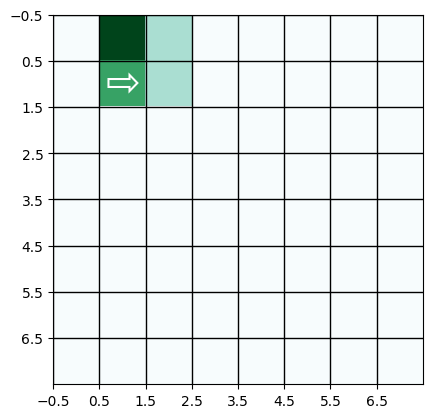

['MUGITU', 'AURRERA', 'BALDIN', 'EZ', 'BIRATU', 'EZK', 'AMAITU', 'BALDIN', 'AMAITU', 'BALDIN'] kodea del baldin


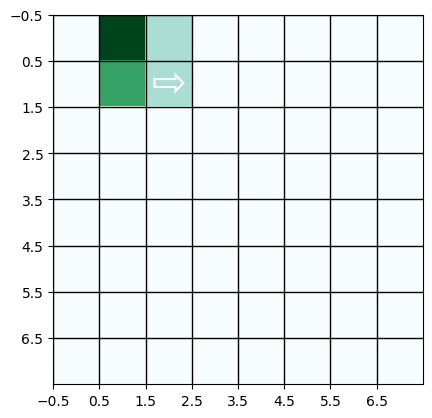

['BIRATU', 'EZK'] kodea del baldin


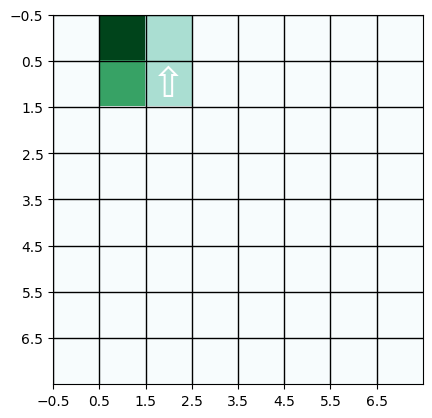

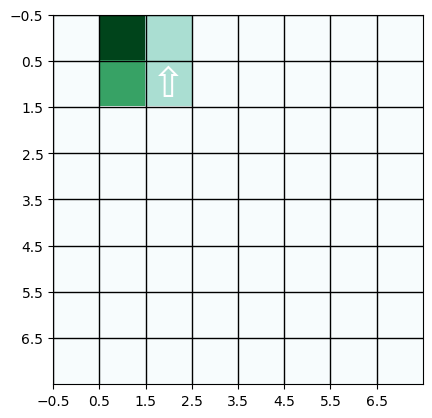

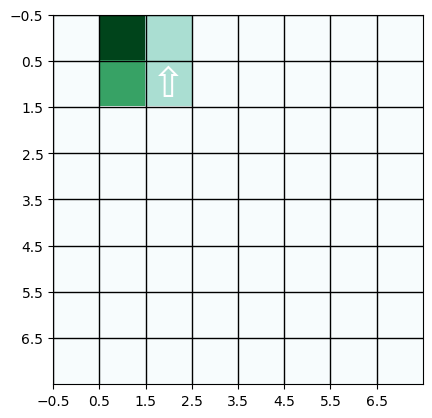

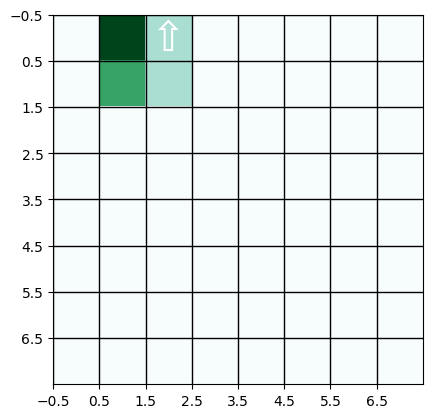

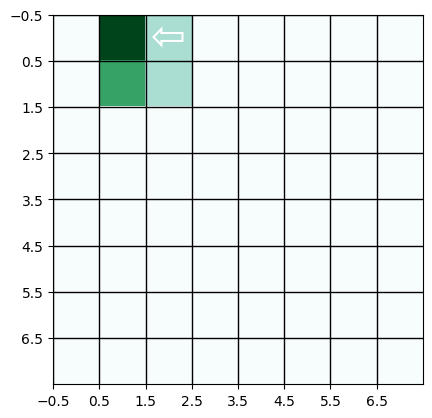

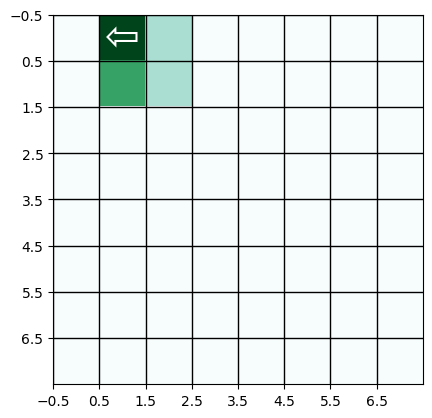

😄 ZURE KODEA EGOKIA DA!


In [22]:
progra=['MARTXAN', 'JARRI', 'BIRATU', 'ESK', 'BALDIN','BAI', 'MUGITU', 'AURRERA', 'BESTELA', 'BIRATU',
           'ESK', 'AMAITU', 'BALDIN', 'BIRATU', 'EZK', 'ERREPIKATU', 'N', 'ALDIZ', 'N=', '2', 'MUGITU',
           'AURRERA', 'AMAITU', 'ERREPIKATU', 'BIRATU', 'EZK', 'MUGITU', 'AURRERA' ]

programa1=['MARTXAN', 'JARRI', 'BALDIN', 'EZ', 'BIRATU', 'ESK', 'MUGITU', 'AURRERA', 'BALDIN', 'BAI', 'MUGITU' , 'AURRERA', 'BESTELA', 'BIRATU',
           'EZK', 'AMAITU', 'BALDIN', 'AMAITU', 'BALDIN']

prog = ['MARTXAN', 'JARRI', 'ERREPIKATU', 'N', 'ALDIZ', 'N=', '2', 'BALDIN', 'BAI', 'MUGITU', 'AURRERA', 'AMAITU', 'BALDIN', 'BIRATU', 'ESK', 'AMAITU', 'ERREPIKATU']

prog2 = ['MARTXAN','JARRI', 'BALDIN', 'BAI', 'MUGITU', 'AURRERA', 'BALDIN', 'EZ', 'BIRATU', 'EZK', 'AMAITU', 'BALDIN', 'AMAITU', 'BALDIN', 'MUGITU', 'AURRERA', 'BIRATU', 'EZK', 'MUGITU', 'AURRERA']

m=8
luzera=5
bidea=bideaAukeratu(False, 2)
taula=sortuTaula(bidea)
hasiera,amaiera= bidea[0], bidea[len(bidea)-1]
print("hasiera eta amaiera", hasiera, amaiera)
taula[hasiera[0]][hasiera[1]]=2
taula[amaiera[0]][amaiera[1]]=3
print(prog)
programaHasi(prog2, hasiera, amaiera)